# 12.1 머신러닝 소개

예제 12-1

In [1]:
import numpy as np

# 정답 라벨과 예측 라벨
y = [0,1,2,3,4,4,4,8,1,2]
pred_y = [0,1,1,2,4,3,3,8,1,2]

# 모델이 맞힌 정답 개수 세기
num_corr = 0
for i in range(len(pred_y)):
    if y[i] == pred_y[i]:
        num_corr = num_corr+1

# 정확도 계산
Acc = num_corr/len(pred_y)
print("정확도 = ", Acc)

정확도 =  0.6


예제 12-2

In [2]:
import numpy as np
# 정답 라벨과 예측 라벨
y = [1,0,0,1,1,1,0,1,1,1]
pred_y = [0,1,1,1,1,0,1,0,1,0]

# 혼동행렬 구하기
TP = 0
TN = 0
FP = 0
FN = 0

for i in range(len(pred_y)):
    if y[i] == 1:
        if y[i] == pred_y[i]:
            TP = TP+1
        else :
            FN = FN+1
    else:
        if y[i] == pred_y[i]:
            TN = TN + 1
        else :
            FP = FP + 1

Confusion_mat = np.matrix([[TP, FN],[FP, TN]])
print("혼동행렬 = \n", Confusion_mat)
print("\n")
Precision = TP/(TP+FP)
print("정밀도 = ", Precision)
Recall = TP/(TP+FN)
print("재현율 = ", Recall)
F_1_score = 2*((Precision*Recall)/(Precision+Recall))
print("F_1 점수 = ", F_1_score)

혼동행렬 = 
 [[3 4]
 [3 0]]


정밀도 =  0.5
재현율 =  0.42857142857142855
F_1 점수 =  0.4615384615384615


예제 12-3

In [3]:
import numpy as np

# 실제값과 예측값
y = [1,0,0,1,1,1,0,1,1,1]
pred_y = [1,-2,1,1,3,-1,0,3,5,1]
y_mean = np.mean(y)

# MAE 계산하기
mae = np.sum(np.abs(np.array(y)-np.array(pred_y)))/len(y)
print("MAE = ", mae)

# MSE 계산하기
mse = np.sum((np.array(y)-np.array(pred_y))**2)/len(y)
print("MSE = ", mse)

# RMSE 계산하기
rmse = np.sqrt(mse)
print("RMSE = ", rmse)

# R2 점수 계산하기
SSE = mse
SST = np.sum((np.array(y)-y_mean)**2)/len(y)
R2_score = 1-(SSE/SST)
print("R2 score = ", R2_score)

MAE =  1.3
MSE =  3.3
RMSE =  1.816590212458495
R2 score =  -14.714285714285715


# 12.2 분류 알고리즘

예제 12-4

In [4]:
import numpy as np

# 유클리드 거리를 구하는 함수
def cal_Euclidean_dist(vec1, vec2):
    import numpy as np
    Euclidean_dist = np.sqrt(np.sum((vec1-vec2)**2))
    return Euclidean_dist

# 다수결 투표 함수
def majority_vote(list):
    count = 0
    label_class = 0
    for x in list:
        if list.count(x) > count:
            count = list.count(x)
            label_class = x
    return label_class

X = np.array([ [10,9] , [1,4] , [10,1] , [7,10] , [3,10] , [1,1]] )
y = np.array([ ['과일'], ['단백질'], ['과일'], ['야채'], ['야채'], ['단백질']] )

k = 3
Input_data = np.array([6,7])

# 입력 데이터와 X 사이의 거리 테이블
dist_table = []
for i in range(len(X)):
    euclidean_dist = cal_Euclidean_dist(Input_data, X[i])
    dist_table.append(euclidean_dist)

print("입력 데이터와 X 사이의 거리 테이블 = \n", dist_table)
print("\n")

# 계산된 거리를 이용하여 X와 y를 거리가 큰 순으로 정렬
# np.argsort() : 정렬한 후 해당 요소의 인덱스를 출력하는 함수
dist_table_array = np.array(dist_table)
X_sort = X[np.argsort(-dist_table_array)]
y_sort = y[np.argsort(-dist_table_array)]

print("X를 거리가 큰 순으로 정렬 = \n", X_sort)
print("\n")
print("y를 거리가 큰 순으로 정렬 = \n", y_sort)
print("\n")

# k=3이므로 가장 높은 3개를 뽑아 다수결 투표하여 라벨 정하기
input_label = majority_vote(list(y_sort[-k:]))
print("입력 데이터의 라벨 = ", input_label)

입력 데이터와 X 사이의 거리 테이블 = 
 [4.47213595499958, 5.830951894845301, 7.211102550927978, 3.1622776601683795, 4.242640687119285, 7.810249675906654]


X를 거리가 큰 순으로 정렬 = 
 [[ 1  1]
 [10  1]
 [ 1  4]
 [10  9]
 [ 3 10]
 [ 7 10]]


y를 거리가 큰 순으로 정렬 = 
 [['단백질']
 ['과일']
 ['단백질']
 ['과일']
 ['야채']
 ['야채']]


입력 데이터의 라벨 =  ['야채']


예제 12-5

In [5]:
import numpy as np

# 엔트로피를 계산하는 함수
def cal_entropy(Node) :
    prop_1 = Node[0]/np.sum(Node)
    prop_2 = Node[1]/np.sum(Node)
    entropy_val = -np.sum([prop_1*np.log2(prop_1),prop_2*np.log2(prop_2)])
    return entropy_val

# 엔트로피를 이용해 정보 이득을 계산하는 함수
def cal_InformationGain_entropy(Parent_Node , Left_child_Node, Right_child_Node) :
    Parent_entropy_val = cal_entropy(Parent_Node)
    left_child_entropy_val = cal_entropy(Left_child_Node)
    right_child_entropy_val = cal_entropy(Right_child_Node)
    left_child_prop = np.sum(Left_child_Node)/np.sum(Parent_Node)
    right_child_prop = np.sum(Right_child_Node)/np.sum(Parent_Node)
    IG_entropy_val = Parent_entropy_val - (left_child_prop * left_child_entropy_val) - (right_child_prop * right_child_entropy_val)
    return IG_entropy_val

# 지니 불순도를 계산하는 함수
def cal_Gini(Node) :
    prop_1 = Node[0]/np.sum(Node)
    prop_2 = Node[1]/np.sum(Node)
    entropy_val = 1-np.sum([prop_1**2,prop_2**2])
    return entropy_val

# 지니 불순도를 이용해 정보 이득을 계산하는 함수
def cal_InformationGain_Gini(Parent_Node , Left_child_Node, Right_child_Node) :
    Parent_entropy_val = cal_Gini(Parent_Node)
    left_child_entropy_val = cal_Gini(Left_child_Node)
    right_child_entropy_val = cal_Gini(Right_child_Node)
    left_child_prop = np.sum(Left_child_Node)/np.sum(Parent_Node)
    right_child_prop = np.sum(Right_child_Node)/np.sum(Parent_Node)
    IG_Gini_val = Parent_entropy_val - (left_child_prop * left_child_entropy_val) -(right_child_prop * right_child_entropy_val)
    return IG_Gini_val

# 부모노드와 자식노드 설정
parent_Node = [50, 50]
left_child_Node = [40, 10]
right_child_Node = [40, 10]

# 엔트로피 계산
parent_entropy = cal_entropy(parent_Node)
left_child_entropy = cal_entropy(left_child_Node)
right_child_entropy = cal_entropy(right_child_Node)
IG_entropy = cal_InformationGain_entropy(parent_Node, left_child_Node, right_child_Node)

print("부모노드의 엔트로피 값 = ", parent_entropy )
print("왼쪽 자식노드의 엔트로피 값 = ", left_child_entropy )
print("오른쪽 자식노드의 엔트로피 값 = ", right_child_entropy )
print("엔트로피를 이용한 정보 이득 함수의 값 = ",IG_entropy )
print("\n")

# 지니 불순도 계산
parent_Gini = cal_Gini(parent_Node)
left_child_Gini = cal_Gini(left_child_Node)
right_child_Gini = cal_Gini(right_child_Node)
IG_Gini = cal_InformationGain_Gini(parent_Node, left_child_Node, right_child_Node)

print("부모노드의 지니 불순도 값 = ", parent_Gini )
print("왼쪽 자식노드의 지니 불순도 값 = ", left_child_Gini )
print("오른쪽 자식노드의 지니 불순도 값 = ", right_child_Gini )
print("지니 불순도를 이용한 정보 이득 함수의 값 = ",IG_Gini )

부모노드의 엔트로피 값 =  1.0
왼쪽 자식노드의 엔트로피 값 =  0.7219280948873623
오른쪽 자식노드의 엔트로피 값 =  0.7219280948873623
엔트로피를 이용한 정보 이득 함수의 값 =  0.2780719051126377


부모노드의 지니 불순도 값 =  0.5
왼쪽 자식노드의 지니 불순도 값 =  0.31999999999999984
오른쪽 자식노드의 지니 불순도 값 =  0.31999999999999984
지니 불순도를 이용한 정보 이득 함수의 값 =  0.18000000000000016


# 12.3 회귀분석 알고리즘

예제 12-6

기울기인 w_1 =  0.5399572473896244
y절편인 w_0=  115.47607498150123


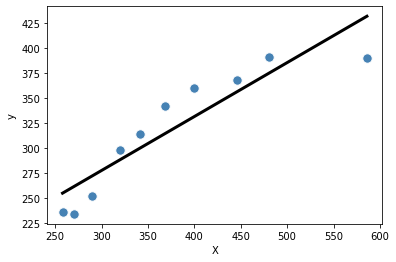

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 훈련 데이터셋 구성
X = np.array([ [258], [270], [290], [320], [342], [368], [400], [446], [480], [586] ])
y = np.array([ 236, 234, 252, 298, 314, 342, 360, 368, 391, 390 ])

# 선형회귀모델 학습
# LinearRegression() : 머신러닝 라이브러리인 사이킷런의 선형회귀모델 구축함수
linear_reg = LinearRegression()
linear_reg.fit(X, y.T)
print("기울기인 w_1 = ", linear_reg.coef_[0])
print("y절편인 w_0= ", linear_reg.intercept_)

# 훈련 데이터셋과 선형회귀직선의 그래프 그리기
plt.scatter(X, y, c='steelblue', edgecolor='white', s=90)
plt.plot(X, linear_reg .predict(X), color='black', lw=3)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

예제 12-7

기울기 =  [ 0.00000000e+00  2.38246397e+00 -2.23462309e-03]
y절편 =  -239.64060213836854


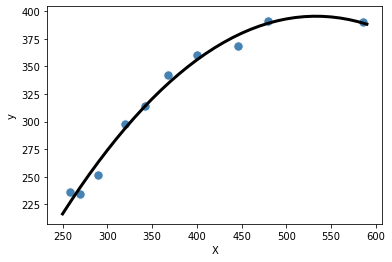



다항회귀식 =  -0.00223462308783962*x**2 + 2.38246396887951*x - 239.640602138369


In [7]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import sympy as sym

# 훈련 데이터셋 구성
X = np.array([ 258, 270, 290, 320, 342, 368, 400, 446, 480, 586 ])[:, np.newaxis]
y = np.array([ 236, 234, 252, 298, 314, 342, 360, 368, 391, 390 ])

# 다항회귀를 위한 훈련 데이터셋 X 구성
Quadratic = PolynomialFeatures(degree=2)
X_Quadratic = Quadratic.fit_transform(X)

# 다항회귀모델 학습
poly_linear_reg = LinearRegression()
poly_linear_reg.fit(X_Quadratic, y)
print("기울기 = ", poly_linear_reg.coef_)
print("y절편 = ", poly_linear_reg.intercept_)

# 훈련 데이터셋과 다항회귀직선의 그래프 그리기
plot_x = np.arange(250,600,10)[:,np.newaxis]
plot_y_poly_fit = poly_linear_reg.predict(Quadratic.fit_transform(plot_x))
plt.scatter(X, y,c='steelblue', edgecolor='white', s=90)
plt.plot(plot_x, plot_y_poly_fit, color='black', lw=3)
plt.xlabel("X")
plt.ylabel("y")
plt.show()
print("\n")

# 다항회귀식 살펴보기
x = sym.Symbol('x')
f = poly_linear_reg.coef_[0] * x**0 + poly_linear_reg.coef_[1] * x**1 + poly_linear_reg.coef_[2] * x**2 + poly_linear_reg.intercept_
print("다항회귀식 = ", f)

# 12.4 군집화와 주성분분석

예제 12-8

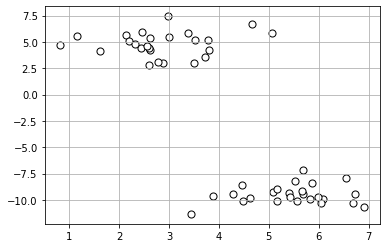

In [8]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# k-평균 군집화를 위한 2차원 데이터 생성
# make_blobs() : 가우시안 분포를 이용해 가상 데이터를 생성하는 함수
X, y = make_blobs(n_samples = 50, n_features = 2, centers = 2, cluster_std = 1, shuffle = True, random_state = 10)

# 생성한 2차원 데이터를 산점도 그래프로 표현
plt.scatter(X[:,0], X[:,1], c="white", marker ="o", edgecolor ="black", s = 50)
plt.grid()
plt.show()

예제 12-9

k = 2 일 때,


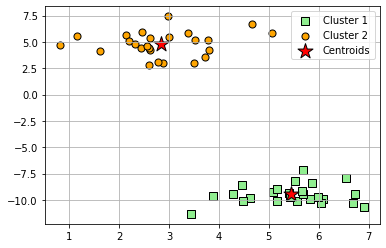



k = 3 일 때,


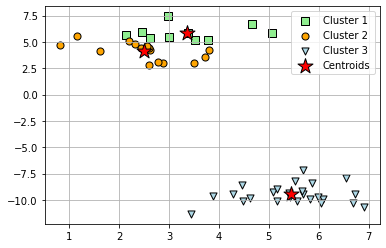

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# k-평균 군집화를 위한 2차원 데이터 생성
X, y = make_blobs(n_samples = 50, n_features = 2, centers = 2, cluster_std = 1, shuffle = True, random_state = 10)

# k = 2일 때, k-평균 군집화 학습
# KMeans() : 사이킷런에 k-평균 군집화 구축해주는 함수
print("k = 2 일 때,")
km_2 = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km_2 = km_2.fit_predict(X)

# k = 2일 때, k-평균 군집화와 생성 데이터를 산점도 그래프로 표현
plt.scatter(X[y_km_2 == 0, 0], X[y_km_2 == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km_2 == 1, 0], X[y_km_2 == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(km_2.cluster_centers_[:, 0], km_2.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()
print("\n")

# k = 3일 때, k-평균 군집화 학습
print("k = 3 일 때,")
km_3 = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km_3 = km_3.fit_predict(X)

# k = 3일 때, k-평균 군집화와 생성 데이터를 산점도 그래프로 표현
plt.scatter(X[y_km_3 == 0, 0], X[y_km_3 == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km_3 == 1, 0], X[y_km_3 == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(X[y_km_3 == 2, 0], X[y_km_3 == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')
plt.scatter(km_3.cluster_centers_[:, 0], km_3.cluster_centers_[:, 1], s=250, marker='*',
c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

예제 12-10

k=2일 때,


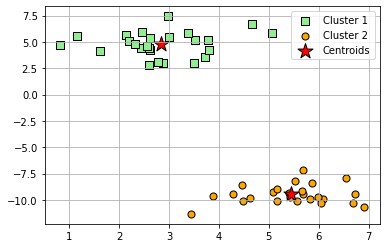



k=3일 때,


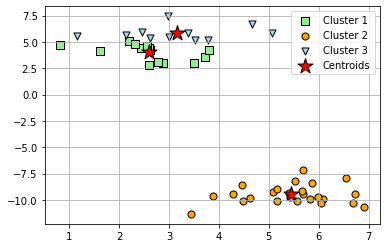

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# k-평균 군집화를 위한 2차원 데이터 생성
X, y = make_blobs(n_samples = 50, n_features = 2, centers = 2, cluster_std = 1, shuffle = True, random_state = 10)

# k=2일 때, k-평균++ 학습
print("k=2일 때,")
km_2 = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km_2 = km_2.fit_predict(X)

# k=2일 때, k-평균++와 생성 데이터를 산점도 그래프로 표현
plt.scatter(X[y_km_2 == 0, 0], X[y_km_2 == 0, 1], s=50, c='lightgreen',
            marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km_2 == 1, 0], X[y_km_2 == 1, 1], s=50, c='orange',
            marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(km_2.cluster_centers_[:, 0], km_2.cluster_centers_[:, 1], s=250, marker='*',
            c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()
print("\n")

# k=3일 때, k-평균++ 학습
print("k=3일 때,")
km_3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km_3 = km_3.fit_predict(X)
# k=3일 때, k-평균++와 생성 데이터를 산점도 그래프로 표현
plt.scatter(X[y_km_3 == 0, 0], X[y_km_3 == 0, 1], s=50, c='lightgreen',
            marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km_3 == 1, 0], X[y_km_3 == 1, 1], s=50, c='orange',
            marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(X[y_km_3 == 2, 0], X[y_km_3 == 2, 1], s=50, c='lightblue',
            marker='v', edgecolor='black', label='Cluster 3')
plt.scatter(km_3.cluster_centers_[:, 0], km_3.cluster_centers_[:, 1], s=250, marker='*',
            c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

예제 12-11

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler

X = np.array([[2, 3],[3, 3],[4, 3],[4, 4],[5, 4],[5, 5],[6, 5],[7, 5]])

# 데이터 X의 표준화 전처리((x-평균)/분산값으로 전처리)
# StandardScaler() : 데이터의 표준화 전처리를 진행하는 함수
sc = StandardScaler()
X_std = sc.fit_transform(X)

print("전처리된 X = \n", X_std)
print("\n")

# 공분산행렬을 만들고, 고윳값과 고유벡터 계산하기
cov_mat = np.cov(X_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("공분산행렬 = \n", cov_mat)
print("\n")
print("고윳값 = ", eigen_vals)
print("고유벡터 = \n", eigen_vecs)
print("\n")

# (고윳값, 고유벡터)를 묶는 튜플의 리스트를 만들기
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# 높은 값에서 낮은 값 순으로 (고윳값, 고유벡터) 튜플 정렬하기
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# 1차원으로 변환하는 투영행렬 W
W = eigen_pairs[0][1][:, np.newaxis]
print("투영행렬 W = \n", W)

전처리된 X = 
 [[-1.66666667 -1.15470054]
 [-1.         -1.15470054]
 [-0.33333333 -1.15470054]
 [-0.33333333  0.        ]
 [ 0.33333333  0.        ]
 [ 0.33333333  1.15470054]
 [ 1.          1.15470054]
 [ 1.66666667  1.15470054]]


공분산행렬 = 
 [[1.14285714 0.98974332]
 [0.98974332 1.14285714]]


고윳값 =  [0.15311382 2.13260046]
고유벡터 = 
 [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


투영행렬 W = 
 [[-0.70710678]
 [-0.70710678]]


# Ch 12 프로그래밍 실습

12.1 분류 알고리즘을 실습하기 위해 잘 알려진 붓꽃 데이터셋(iris dataset)을 불러온다. 붓꽃 데이터셋의 전체 특성이 아닌 3번째 열과 4번째 열의 특성을 이용해 k-최근접 이웃 알고리즘, 의사결정 트리 알고리즘, 랜덤 포레스트 알고리즘으로 분류하여 그래프로 표현하라.

클래스 레이블: [0 1 2]
0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica


y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


k=5에 대하여, 유클리드 거리를 이용한 k-최근접 이웃 알고리즘 


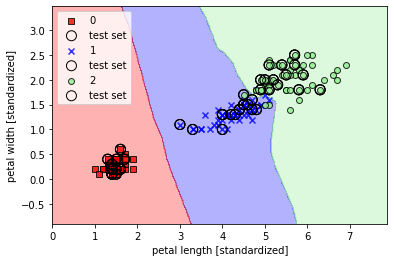



지니 불순도를 이용한 의사결정트리 알고리즘


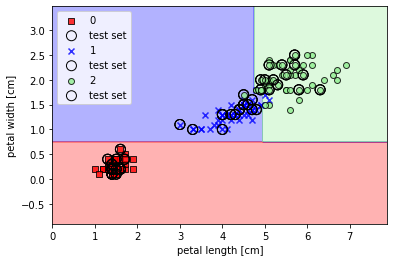



지니 불순도를 이용한 랜덤 포레스트 알고리즘


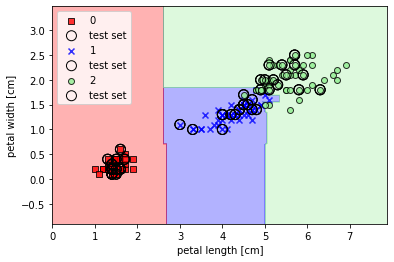

In [12]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# 결정 경계를 그래프로 그려주는 함수
def make_plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # 그래프에 표시할 데이터의 마크와 색깔 설정하기
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
        # 테스트 샘플을 강조하여 그리기
        if test_idx:
            # 모든 샘플 그리기
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        facecolor='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100,
                        label='test set')

# 붓꽃 데이터셋 불러오기
iris = datasets.load_iris()

# 붓꽃 데이터셋에서 사용할 특성
X = iris.data[:, [2, 3]]
y = iris.target

# 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica
print("클래스 레이블:", np.unique(y))
print("0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica")
print("\n")

# 7:3의 비율로 훈련 데이터셋과 테스트 데이터셋 구분하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))
print("\n")

# 데이터 표준화 전처리하기
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# k=5에 대하여, 유클리드 거리를 이용한 k-최근접 이웃 알고리즘
from sklearn.neighbors import KNeighborsClassifier

print("k=5에 대하여, 유클리드 거리를 이용한 k-최근접 이웃 알고리즘 ")
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)

make_plot_decision_regions(X_combined, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()
print("\n")

# 지니 불순도를 이용한 의사결정트리 알고리즘
from sklearn.tree import DecisionTreeClassifier
print("지니 불순도를 이용한 의사결정트리 알고리즘")
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)

make_plot_decision_regions(X_combined, y_combined,classifier=tree_model, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()
print("\n")

# 지니 불순도를 이용한 랜덤 포레스트 알고리즘
from sklearn.ensemble import RandomForestClassifier
print("지니 불순도를 이용한 랜덤 포레스트 알고리즘")
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1,n_jobs=2)
forest.fit(X_train, y_train)
make_plot_decision_regions(X_combined, y_combined,classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

12.2 http://www.hanbit.co.kr → [SUPPORT] → [자료실] → [소스코드]에서 housing.data.txt를
다운받아 소스코드와 동일한 폴더에 저장한 다음, 주택 데이터셋을 이용하여 선형회귀를 실습한
다. 제공하는 주택 데이터셋을 판다스(pandas)의 데이터 프레임 형태로 전환한다. 

주택 데이터셋의 특성 중 ‘RM’과 ‘MEDV’ 간의 선형회귀모델을 프로그래밍하여 이 데이터에 관
한 그래프를 그려라.

주택 데이터셋에서의 top 5개 샘플 = 
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


기울기: 9.102
절편: -34.671




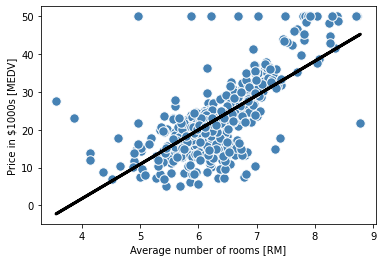

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 주택 데이터셋 불러오기
df = pd.read_csv('housing.data.txt', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
              'PTRATIO', 'B', 'LSTAT', 'MEDV']

print("주택 데이터셋에서의 top 5개 샘플 = \n",df.head())
print("\n")

# 특성 ‘RM’은 X로, 특성 ‘MEDV’는 y로 추출하기
X = df[['RM']].values
y = df['MEDV'].values

# X, y를 표준화 전처리
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

# 선형회귀모델의 학습 및 예측
linear_reg = LinearRegression()
linear_reg.fit(X, y)
y_pred = linear_reg.predict(X)
print('기울기: %.3f' % linear_reg.coef_[0])
print('절편: %.3f' % linear_reg.intercept_)
print("\n")

# 그래프 그리기
plt.scatter(X, y, c='steelblue', edgecolor='white', s=90)
plt.plot(X, y_pred, color='black', lw=3)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

12.3 데이터 개수는 500개이고 특성은 4개가 되도록 데이터를 생성한다. 그리고 이 데이터를 이용하
여 k=3, 4일 때의 k-평균 군집화와 k-평균++를 각각 학습하여 산점도 그래프로 표현하라.

k-평균 군집화
k=3일 때,


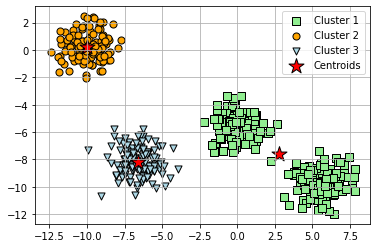



k=4일 때,


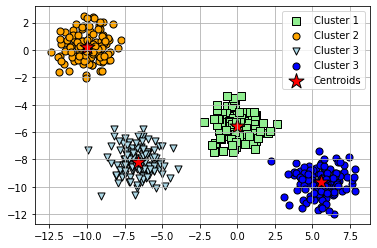



k-평균++
k=3일 때,


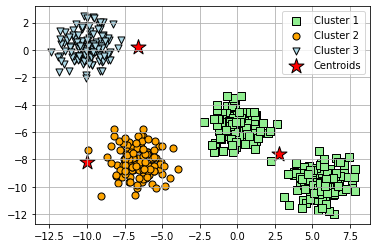



k=4일 때,


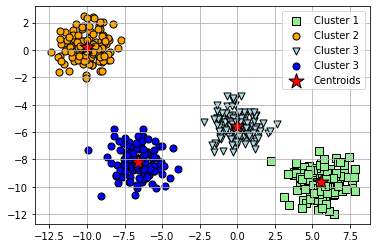

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 데이터 생성
X, y = make_blobs(n_samples = 500, n_features = 4, centers = 4, cluster_std = 1,
                  shuffle = True, random_state = 10)

# k-평균 군집화
print("k-평균 군집화")
# k=3
print("k=3일 때,")
km_3 = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
y_km_3 = km_3.fit_predict(X)

plt.scatter(X[y_km_3 == 0, 0], X[y_km_3 == 0, 1], s=50, c='lightgreen',
            marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km_3 == 1, 0], X[y_km_3 == 1, 1], s=50, c='orange',
            marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(X[y_km_3 == 2, 0], X[y_km_3 == 2, 1], s=50, c='lightblue',
            marker='v', edgecolor='black', label='Cluster 3')
plt.scatter(km_3.cluster_centers_[:, 0], km_3.cluster_centers_[:, 1], s=250,
            marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()
print("\n")

# k=4
print("k=4일 때,")
km_4 = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km_4 = km_4.fit_predict(X)
plt.scatter(X[y_km_4 == 0, 0], X[y_km_4 == 0, 1], s=50, c='lightgreen',
            marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km_4 == 1, 0], X[y_km_4 == 1, 1], s=50, c='orange',
            marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(X[y_km_4 == 2, 0], X[y_km_4 == 2, 1], s=50, c='lightblue',
            marker='v', edgecolor='black', label='Cluster 3')
plt.scatter(X[y_km_4 == 3, 0], X[y_km_4 == 3, 1], s=50, c='blue',
            marker='o', edgecolor='black', label='Cluster 3')
plt.scatter(km_4.cluster_centers_[:, 0], km_4.cluster_centers_[:, 1], s=250,
            marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()
print("\n")

# k-평균++
print("k-평균++")

# k=3
print("k=3일 때,")
km_3_pp = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04,
                 random_state=0)
y_km_3_pp = km_3_pp.fit_predict(X)
plt.scatter(X[y_km_3_pp == 0, 0], X[y_km_3_pp == 0, 1], s=50, c='lightgreen',
            marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km_3_pp == 1, 0], X[y_km_3_pp == 1, 1], s=50, c='orange',
            marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(X[y_km_3_pp == 2, 0], X[y_km_3_pp == 2, 1], s=50, c='lightblue',
            marker='v', edgecolor='black', label='Cluster 3')
plt.scatter(km_3_pp.cluster_centers_[:, 0], km_3.cluster_centers_[:, 1], s=250,
            marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()
print("\n")

# k=4
print("k=4일 때,")
km_4_pp = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)

y_km_4_pp = km_4_pp.fit_predict(X)
plt.scatter(X[y_km_4_pp == 0, 0], X[y_km_4_pp == 0, 1], s=50, c='lightgreen',
            marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km_4_pp == 1, 0], X[y_km_4_pp == 1, 1], s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km_4_pp == 2, 0], X[y_km_4_pp == 2, 1], s=50, c='lightblue',
            marker='v', edgecolor='black', label='Cluster 3')
plt.scatter(X[y_km_4_pp == 3, 0], X[y_km_4_pp == 3, 1], s=50, c='blue',
            marker='o', edgecolor='black', label='Cluster 3')
plt.scatter(km_4_pp.cluster_centers_[:, 0], km_4_pp.cluster_centers_[:, 1], s=250,
            marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()